In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [4]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
from nn_smoothing_1D import NNSmoothing1D

In init py ['/talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian', '', '/mpcdf/soft/SLE_15/packages/x86_64/keras/anaconda_3_2019.03-2019.03/2.3.1/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.2.0/lib/python3.7/site-packages', '/u/wangnisn/kaggle/defect_in_steel/version3/code/dummy_11a', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python37.zip', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/lib-dynload', '/u/wangnisn/.local/lib/python3.7/site-packages', '/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/x86_64/ana

W0528 19:16:50.546636 47892884860288 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0528 19:16:50.591430 47892884860288 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_1D.py:14: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [7]:
data = loadmat('../data/phase_field_oneD_last641_filtered.mat')

In [8]:
data['usol'].shape

(500, 641)

In [9]:
a = np.array([[1,2]])

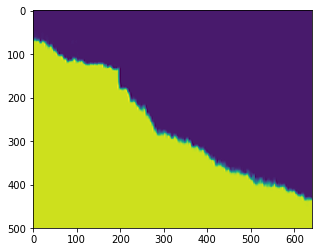

In [10]:
plt.imshow(data['usol'])

In [11]:
data['usol'].shape

(500, 641)

In [12]:
# calculate derivatives and prepare data
u = data['usol'][300:450,300:600]
t = np.squeeze(data['t'])[300:600]
x = np.squeeze(data['x'])[300:450]

In [13]:
u.shape

(150, 300)

In [14]:
x_mesh, t_mesh = np.meshgrid(x,t,indexing='ij')

In [15]:
x_train =  x_mesh.flatten()

In [16]:
t_train = t_mesh.flatten()

In [17]:
y_train = u.flatten()

In [18]:
hidden_layers = [ 20, 20, 20, 20, 20, 20, 20]

In [19]:
nnsmooth = NNSmoothing1D(x=x_train, t=t_train,u=y_train, hidden_layers=hidden_layers,alpha=10.0)

W0528 19:16:58.741741 47892884860288 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_1D.py:80: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0528 19:16:58.842073 47892884860288 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_1D.py:38: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0528 19:16:58.846744 47892884860288 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_1D.py:38: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0528 19:17:00.253139 47892884860288 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_1D.py:41: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0528 19:17:03.316546 47892884860288 lazy_loader.py:5

In [27]:
a = np.array([[1,2],[3,4]])

In [25]:
nnsmooth.train(10000)

It: 0, Loss: 2.724e+04, Time: 2.30
It: 10, Loss: 7.299e+03, Time: 0.44
It: 20, Loss: 3.394e+03, Time: 0.42
It: 30, Loss: 2.827e+03, Time: 0.42
It: 40, Loss: 2.528e+03, Time: 0.43
It: 50, Loss: 2.360e+03, Time: 0.43
It: 60, Loss: 2.227e+03, Time: 0.42
It: 70, Loss: 2.136e+03, Time: 0.43
It: 80, Loss: 2.011e+03, Time: 0.42
It: 90, Loss: 1.870e+03, Time: 0.44
It: 100, Loss: 1.702e+03, Time: 0.44
It: 110, Loss: 1.504e+03, Time: 0.42
It: 120, Loss: 1.285e+03, Time: 0.43
It: 130, Loss: 1.084e+03, Time: 0.43
It: 140, Loss: 9.497e+02, Time: 0.43
It: 150, Loss: 8.808e+02, Time: 0.44
It: 160, Loss: 8.345e+02, Time: 0.43


KeyboardInterrupt: 

In [100]:
u_predict, u_t_predict, u_x_predict, u_xx_predict = nnsmooth.predict(x_train, t_train)

In [101]:
u.shape

(150, 300)

In [102]:
u_predict = np.reshape(u_predict, u.shape)
u_t_predict = np.reshape(u_t_predict, u.shape)
u_x_predict = np.reshape(u_x_predict, u.shape)
u_xx_predict = np.reshape(u_xx_predict, u.shape)

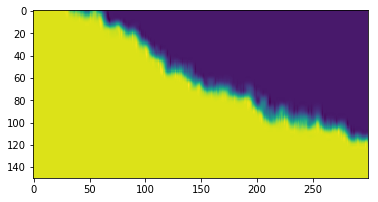

In [116]:
plt.imshow(u)

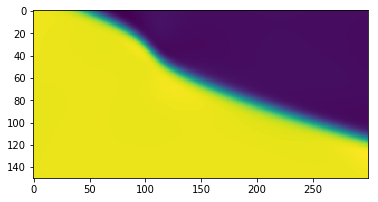

In [103]:
plt.imshow(u_predict)

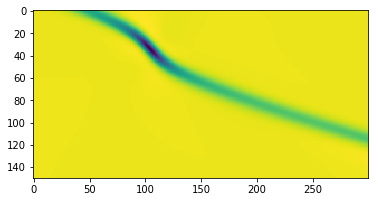

In [104]:
plt.imshow(u_t_predict)

In [117]:
ind = 40

In [ ]:
plt.plot(u_t_predict[ind,:])
plt.plot(u_x_predict[ind,:])

In [119]:
u_x_predict.shape

(150, 300)

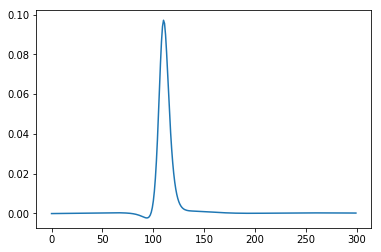

In [120]:
plt.plot(u_x_predict[ind,:])

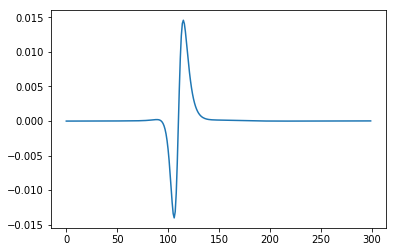

In [121]:
plt.plot(u_xx_predict[ind,:])

In [123]:
np.save('train_data_experiment',np.vstack([u_predict.flatten(),u_x_predict.flatten(),u_xx_predict.flatten(), u_t_predict.flatten()]).T)